# Lista 1

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
spark = SparkSession.builder.getOrCreate()

import pandas as pd

1. Defina seu diretório de trabalho, onde estará o arquivo.
2. Carregue o dataset na área de trabalho de ambos os softwares.

In [4]:
!ls /opt/dna-qualicorp/notebooks/stat/datasets/

dataset-2.csv  dataset-3.csv  dataset.csv  hour.csv


In [5]:
df = spark.read.csv('/opt/dna-qualicorp/notebooks/stat/datasets/hour.csv', header=True)

df.printSchema()

root
 |-- instant: string (nullable = true)
 |-- dteday: string (nullable = true)
 |-- season: string (nullable = true)
 |-- yr: string (nullable = true)
 |-- mnth: string (nullable = true)
 |-- hr: string (nullable = true)
 |-- holiday: string (nullable = true)
 |-- weekday: string (nullable = true)
 |-- workingday: string (nullable = true)
 |-- weathersit: string (nullable = true)
 |-- temp: string (nullable = true)
 |-- atemp: string (nullable = true)
 |-- hum: string (nullable = true)
 |-- windspeed: string (nullable = true)
 |-- casual: string (nullable = true)
 |-- registered: string (nullable = true)
 |-- cnt: string (nullable = true)



In [6]:
df.limit(5).toPandas()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,0,1,1


3. Calcule a média, mediana e moda do dataset.

## mean

In [20]:
df.describe().toPandas()

,summary,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,count,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379
1,mean,8690.0,None,2.5016399102364923,0.5025605615973301,6.537775476149376,11.546751826917545,0.028770355026181024,3.003682605443351,0.6827205247712756,1.425283387997008,0.4969871684216586,0.4757751021347581,0.6272288394038822,0.1900976063064631,35.67621842453536,153.78686920996606,189.46308763450142
2,stddev,5017.029499614288,None,1.10691813944808,0.5000078290910193,3.4387757137501724,6.9144050952644776,0.1671652763843717,2.005771456110986,0.4654306335238818,0.6393568777542525,0.19255612124972202,0.1718502156353594,0.19292983406291458,0.12234022857279034,49.30503038705298,151.35728591258325,181.3875990918646
3,min,1,2011-01-01,1,0,1,0,0,0,0,1,0.02,0,0,0,0,0,1
4,max,9999,2012-12-31,4,1,9,9,1,6,1,4,1,1,1,0.8507,99,99,99


## median

In [36]:
# the 50th percentile is the median
for c in df.columns:
    df.selectExpr(f'percentile({c}, 0.5) as {c}_mode').show()


+------------+
|instant_mode|
+------------+
|      8690.0|
+------------+

+-----------+
|dteday_mode|
+-----------+
|       null|
+-----------+

+-----------+
|season_mode|
+-----------+
|        3.0|
+-----------+

+-------+
|yr_mode|
+-------+
|    1.0|
+-------+

+---------+
|mnth_mode|
+---------+
|      7.0|
+---------+

+-------+
|hr_mode|
+-------+
|   12.0|
+-------+

+------------+
|holiday_mode|
+------------+
|         0.0|
+------------+

+------------+
|weekday_mode|
+------------+
|         3.0|
+------------+

+---------------+
|workingday_mode|
+---------------+
|            1.0|
+---------------+

+---------------+
|weathersit_mode|
+---------------+
|            1.0|
+---------------+

+---------+
|temp_mode|
+---------+
|      0.5|
+---------+

+----------+
|atemp_mode|
+----------+
|    0.4848|
+----------+

+--------+
|hum_mode|
+--------+
|    0.63|
+--------+

+--------------+
|windspeed_mode|
+--------------+
|         0.194|
+--------------+

+-----------+
|c

## mode

In [51]:
for c in df.columns:
    df.groupBy(c).count().orderBy(F.desc(c)).show(1)

+-------+-----+
|instant|count|
+-------+-----+
|   9999|    1|
+-------+-----+
only showing top 1 row

+----------+-----+
|    dteday|count|
+----------+-----+
|2012-12-31|   24|
+----------+-----+
only showing top 1 row

+------+-----+
|season|count|
+------+-----+
|     4| 4232|
+------+-----+
only showing top 1 row

+---+-----+
| yr|count|
+---+-----+
|  1| 8734|
+---+-----+
only showing top 1 row

+----+-----+
|mnth|count|
+----+-----+
|   9| 1437|
+----+-----+
only showing top 1 row

+---+-----+
| hr|count|
+---+-----+
|  9|  727|
+---+-----+
only showing top 1 row

+-------+-----+
|holiday|count|
+-------+-----+
|      1|  500|
+-------+-----+
only showing top 1 row

+-------+-----+
|weekday|count|
+-------+-----+
|      6| 2512|
+-------+-----+
only showing top 1 row

+----------+-----+
|workingday|count|
+----------+-----+
|         1|11865|
+----------+-----+
only showing top 1 row

+----------+-----+
|weathersit|count|
+----------+-----+
|         4|    3|
+----------+-----+

4. Calcule a temperatura (coluna temp) média por dia da semana (coluna weekday).

In [74]:
from pyspark.sql.window import Window

window = Window.partitionBy('weekday')

(
df.withColumn('mean_temp_by_weekday', F.avg('temp').over(window))
    .groupBy('weekday', 'mean_temp_by_weekday')
    .agg(F.first('weekday'))
    .orderBy('weekday')
    .show()
)


+-------+--------------------+---------------------+
|weekday|mean_temp_by_weekday|first(weekday, false)|
+-------+--------------------+---------------------+
|      0|  0.4838209432454044|                    0|
|      1|  0.4950463896732562|                    1|
|      2|   0.508569099062371|                    2|
|      3|  0.5066747474747468|                    3|
|      4|  0.5070174018615946|                    4|
|      5|  0.4964294330518689|                    5|
|      6| 0.48184713375795957|                    6|
+-------+--------------------+---------------------+



5. Crie um histograma na coluna temp.

In [81]:
import matplotlib.pyplot as plt

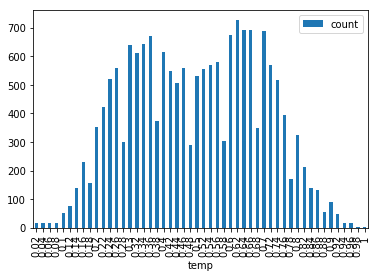

In [113]:
histogram = df.groupBy('temp').count().orderBy('temp')
histogram.toPandas().plot.bar(x='temp', y='count');

interessante https://github.com/Bergvca/pyspark_dist_explore

## BONUS: kde da variavel aleatoria temp

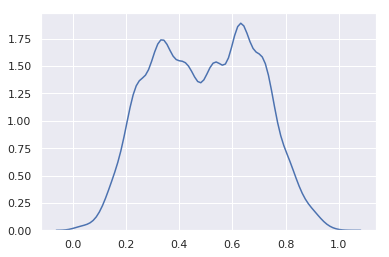

In [122]:
import seaborn as sns; sns.set(color_codes=True)

temp_data = [r['temp'] for r in df.select('temp').collect()]

sns.kdeplot(temp_data);